In [1]:
#importing libraries
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
import pickle
import time
import datetime as DT
from elasticsearch import helpers,Elasticsearch
import csv
import json
import datetime
import matplotlib.pyplot as plt

In [2]:
#reading all datas
data_one=pd.read_csv("data/1.csv",header=None)
data_two=pd.read_csv("data/2.csv",header=None)
data_three=pd.read_csv("data/3.csv",header=None)
data_four=pd.read_csv("data/4.csv",header=None)
data_five=pd.read_csv("data/5.csv",header=None)
data_six=pd.read_csv("data/6.csv",header=None)
data_seven=pd.read_csv("data/7.csv",header=None)
data_eight=pd.read_csv("data/8.csv",header=None)
data_nine=pd.read_csv("data/9.csv",header=None)
data_ten=pd.read_csv("data/10.csv",header=None)
data_eleven=pd.read_csv("data/11.csv",header=None)
data_twelve=pd.read_csv("data/12.csv",header=None)
data_thirteen=pd.read_csv("data/13.csv",header=None)
data_fourteen=pd.read_csv("data/14.csv",header=None)
data_fifteen=pd.read_csv("data/15.csv",header=None)

In [3]:
data_one.head()

,0,1,2,3,4
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [4]:
## replacing sequential number with participant number
data_one[0]=1
data_two[0]=2
data_three[0]=3
data_four[0]=4
data_five[0]=5
data_six[0]=6
data_seven[0]=7
data_eight[0]=8
data_nine[0]=9
data_ten[0]=10
data_eleven[0]=11
data_twelve[0]=12
data_thirteen[0]=13
data_fourteen[0]=14
data_fifteen[0]=15

In [5]:
data_one.tail()

,0,1,2,3,4
162496,1,1927,2388,2074,7
162497,1,1930,2383,2074,7
162498,1,1929,2385,2076,7
162499,1,1926,2385,2078,7
162500,1,1922,2387,2078,0


In [6]:
#Concatenating all dataframes
df=pd.concat([data_one,data_two,data_three,data_four,data_five,data_six,data_seven,data_eight,data_nine,data_ten,data_eleven,data_twelve,data_thirteen,data_fourteen,data_fifteen],axis=0)

In [7]:
df.head()

,0,1,2,3,4
0,1,1502,2215,2153,1
1,1,1667,2072,2047,1
2,1,1611,1957,1906,1
3,1,1601,1939,1831,1
4,1,1643,1965,1879,1


In [8]:
df.shape #shape of final dataframe

(1926896, 5)

In [9]:
df.columns=['seq_no','acc_x','acc_y','acc_z','activity'] ## adding column names

In [10]:
df.head()

,seq_no,acc_x,acc_y,acc_z,activity
0,1,1502,2215,2153,1
1,1,1667,2072,2047,1
2,1,1611,1957,1906,1
3,1,1601,1939,1831,1
4,1,1643,1965,1879,1


In [11]:
df.activity.value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: activity, dtype: int64

In [12]:
df.describe() ## dataframe description

,seq_no,acc_x,acc_y,acc_z,activity
count,1.926896e+06,1.926896e+06,1.926896e+06,1.926896e+06,1.926896e+06
mean,7.512711e+00,1.987652e+03,2.382523e+03,1.970596e+03,3.882898e+00
std,4.172396e+00,1.113578e+02,1.003151e+02,9.445893e+01,2.443402e+00
min,1.000000e+00,2.820000e+02,2.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,1.904000e+03,2.337000e+03,1.918000e+03,1.000000e+00
50%,7.000000e+00,1.992000e+03,2.367000e+03,1.988000e+03,4.000000e+00
75%,1.100000e+01,2.076000e+03,2.413000e+03,2.032000e+03,7.000000e+00
max,1.500000e+01,3.828000e+03,4.095000e+03,4.095000e+03,7.000000e+00


In [13]:
#Check for missing values
def missing_data(df):

            rec = []
            for column_name in df.columns:
                miss_count = df[column_name].isnull().sum(axis=0)
                miss_percent=miss_count/df.shape[0]
                rec.append([column_name,miss_count,miss_percent*100])
                df_stats = pd.DataFrame.from_records(rec, columns = ['column name',
                                                                     'missing_count','missing_percentage'])
                df_stats = df_stats.sort_values('missing_percentage',axis=0, ascending = False )
            return df_stats;

df_missing = missing_data(df)

print("Missing Values \n",df_missing)

Missing Values 
   column name  missing_count  missing_percentage
0      seq_no              0                 0.0
1       acc_x              0                 0.0
2       acc_y              0                 0.0
3       acc_z              0                 0.0
4    activity              0                 0.0


### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe954a97590>,
      dtype=object)

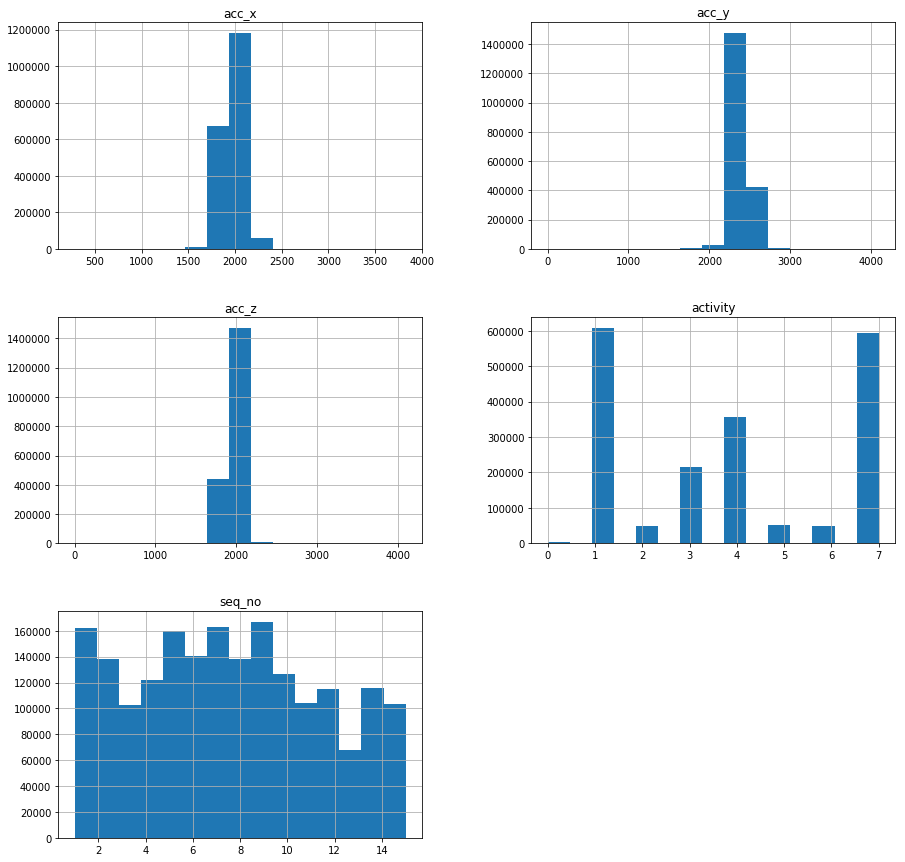

In [14]:
df.hist(bins=15,figsize=(15,15)) ## plotting histograms

### Scatter plot

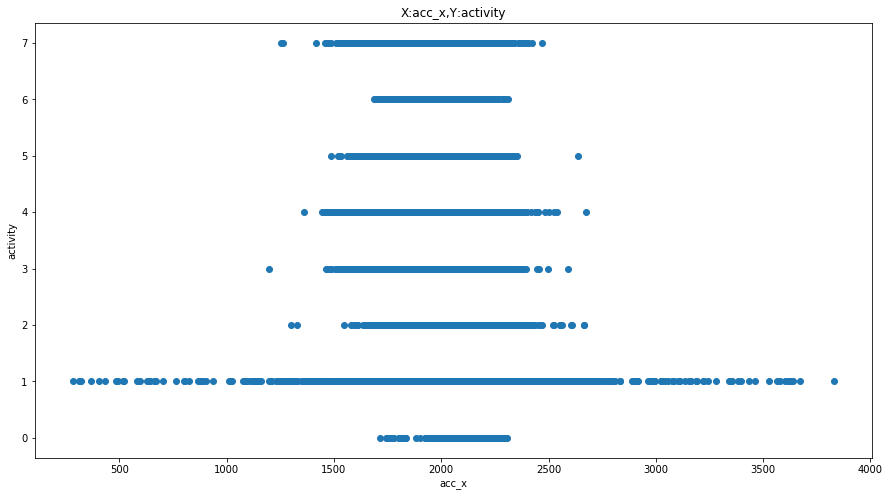

In [15]:
plt.figure(figsize=(15, 8))
xData=df['acc_x']
yData=df['activity']
plt.title("X:acc_x,Y:activity")
plt.xlabel('acc_x')
plt.ylabel('activity')
plt.scatter(xData, yData)
plt.show()

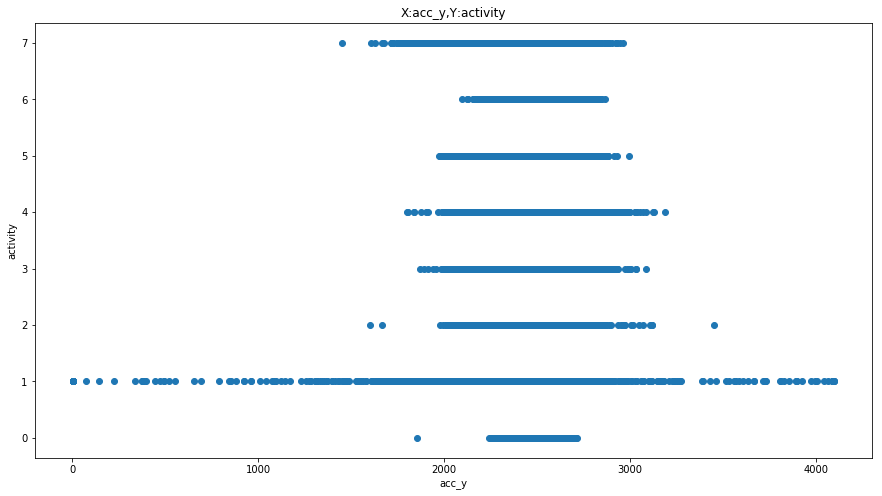

In [16]:
plt.figure(figsize=(15, 8))
xData=df['acc_y']
yData=df['activity']
plt.title("X:acc_y,Y:activity")
plt.xlabel('acc_y')
plt.ylabel('activity')
plt.scatter(xData, yData)
plt.show()

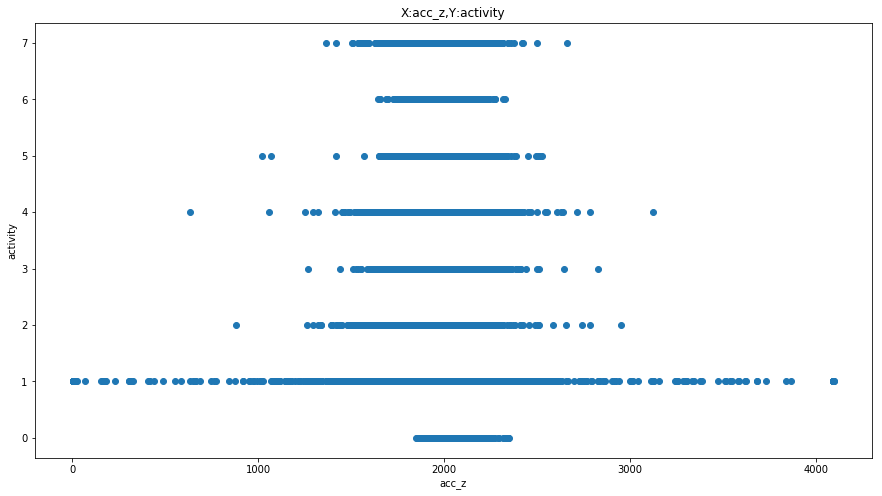

In [17]:
plt.figure(figsize=(15, 8))
xData=df['acc_z']
yData=df['activity']
plt.title("X:acc_z,Y:activity")
plt.xlabel('acc_z')
plt.ylabel('activity')
plt.scatter(xData, yData)
plt.show()

In [18]:
df.acc_x.max()

3828

In [19]:
df.acc_y.max()

4095

In [20]:
df.acc_z.max()

4095

In [21]:
df.acc_x.min()

282

In [22]:
df.acc_y.min()

2

In [23]:
df.acc_z.min()

1

### Bucketing acc_x,acc_y and acc_z

In [24]:
accx_bins=[0,100,200,250,300,700,1000,1500,2000,2400,2800,3400,3600,4000,4500]
accx_labels=['0 - 100','100-200', '200-250', '250-300',
                        '300-700', '700-1000', '1000-1500','1500-2000','2000-2400','2400-2800','2800-3400','3400-3600','3600-4000','4000+']
df['accx_bucket'] = pd.cut(df.acc_x, accx_bins, labels = accx_labels,include_lowest = True)

In [25]:
accy_bins=[0,20,50,70,100,200,250,300,700,1000,1500,2000,2400,2800,3400,3600,4000,4500]
accy_labels=['0 - 20','20-50','50-70','70-100','100-200', '200-250', '250-300',
                        '300-700', '700-1000', '1000-1500','1500-2000','2000-2400','2400-2800','2800-3400','3400-3600','3600-4000','4000+']
df['accy_bucket'] = pd.cut(df.acc_y, accy_bins, labels = accy_labels,include_lowest = True)

In [26]:
accz_bins=[0,20,50,70,100,200,250,300,700,1000,1500,2000,2400,2800,3400,3600,4000,4500]
accz_labels=['0 - 20','20-50','50-70','70-100','100-200', '200-250', '250-300',
                        '300-700', '700-1000', '1000-1500','1500-2000','2000-2400','2400-2800','2800-3400','3400-3600','3600-4000','4000+']
df['accz_bucket'] = pd.cut(df.acc_z, accz_bins, labels = accz_labels,include_lowest = True)

In [27]:
df.head()

,seq_no,acc_x,acc_y,acc_z,activity,accx_bucket,accy_bucket,accz_bucket
0,1,1502,2215,2153,1,1500-2000,2000-2400,2000-2400
1,1,1667,2072,2047,1,1500-2000,2000-2400,2000-2400
2,1,1611,1957,1906,1,1500-2000,1500-2000,1500-2000
3,1,1601,1939,1831,1,1500-2000,1500-2000,1500-2000
4,1,1643,1965,1879,1,1500-2000,1500-2000,1500-2000


In [28]:
df.accx_bucket.value_counts()

1500-2000    997559
2000-2400    928762
2400-2800       372
1000-1500       122
2800-3400        41
300-700          16
700-1000         11
3600-4000         7
3400-3600         5
250-300           1
4000+             0
200-250           0
100-200           0
0 - 100           0
Name: accx_bucket, dtype: int64

In [29]:
df.accy_bucket.value_counts()

2000-2400    1396256
2400-2800     521244
1500-2000       8614
2800-3400        674
1000-1500         35
3600-4000         18
4000+             13
300-700           13
0 - 20            10
3400-3600          8
700-1000           8
200-250            1
100-200            1
70-100             1
250-300            0
50-70              0
20-50              0
Name: accy_bucket, dtype: int64

In [55]:
df.accz_bucket.value_counts()

1500-2000    1104889
2000-2400     821624
1000-1500        145
2400-2800        126
2800-3400         34
0 - 20            18
300-700           16
700-1000          13
4000+              9
3600-4000          7
3400-3600          7
100-200            5
200-250            1
50-70              1
20-50              1
250-300            0
70-100             0
Name: accz_bucket, dtype: int64

### Categorical encoding

In [56]:
df_cat=df[['accx_bucket','accy_bucket','accz_bucket','activity']]

In [57]:
for col in df_cat.columns:
    df_cat[col] = df_cat[col].astype('category')
    df_cat[col] = df_cat[col].cat.add_categories('Unknown')
    df_cat[col].fillna('Unknown', inplace =True)

/home/revathis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/revathis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
df_final=df[['accx_bucket','accy_bucket','accz_bucket','activity']]

In [77]:
le = LabelEncoder()
# df_cat_encoded = df_prod_cat.apply(le.fit_transform)
# print ("before encoding \n",df_final.head)

print('df_cat.columns',df_cat.columns)


dict_all = dict(zip([], []))
for col in df_cat.columns:
    temp_keys = df_cat[col].values

    print('df_cat[col]',df_cat[col])
    temp_values = le.fit_transform(df_cat[col])
    print("done",temp_values)
    dict_temp = dict(zip(temp_keys, temp_values))
    dict_all[col] = dict_temp
    print("Encoder---->",dict_all)

##Label mapping for final table##################
for col in df_cat.columns:
    df_final.replace(dict_all[col], inplace=True)

pickle.dump(dict_all, open("dict_all.obj", 'wb'))
for col in df_final.columns:
    df_final[col] = pd.to_numeric(df_final[col])

df_cat.columns Index(['accx_bucket', 'accy_bucket', 'accz_bucket', 'activity'], dtype='object')
df_cat[col] 0         1500-2000
1         1500-2000
2         1500-2000
3         1500-2000
4         1500-2000
            ...    
103496    2000-2400
103497    2000-2400
103498    2000-2400
103499    2000-2400
103500    1500-2000
Name: accx_bucket, Length: 1926896, dtype: category
Categories (15, object): [0 - 100 < 100-200 < 200-250 < 250-300 ... 3400-3600 < 3600-4000 < 4000+ < Unknown]
done [1 1 1 ... 2 2 1]
Encoder----> {'accx_bucket': {'1500-2000': 1, '1000-1500': 0, '2000-2400': 2, '2400-2800': 3, '2800-3400': 5, '3400-3600': 7, '3600-4000': 8, '700-1000': 9, '300-700': 6, '250-300': 4}}
df_cat[col] 0         2000-2400
1         2000-2400
2         1500-2000
3         1500-2000
4         1500-2000
            ...    
103496    2400-2800
103497    2400-2800
103498    2400-2800
103499    2400-2800
103500    2400-2800
Name: accy_bucket, Length: 1926896, dtype: category
Categories (18, ob

/home/revathis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [78]:
df_final.head()

,accx_bucket,accy_bucket,accz_bucket,activity
0,1,2,2,1
1,1,2,2,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [79]:
df_final.corr() ## Correlation matrix

,accx_bucket,accy_bucket,accz_bucket,activity
accx_bucket,1.000000,0.437670,0.110162,0.160989
accy_bucket,0.437670,1.000000,0.213582,0.030368
accz_bucket,0.110162,0.213582,1.000000,-0.156218
activity,0.160989,0.030368,-0.156218,1.000000


In [80]:
df_final['seq_no']=df['seq_no']

/home/revathis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
df_final.head()

,accx_bucket,accy_bucket,accz_bucket,activity,seq_no
0,1,2,2,1,1
1,1,2,2,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [82]:
df_final = df_final[df_final.activity != 0]

In [83]:
df_model=df_final.drop(['seq_no'],axis=1)

In [84]:
## feature matrix and target variable
X=df_model[['accx_bucket','accy_bucket','accz_bucket']]
y=df_model['activity']

In [85]:
df_processed = pd.get_dummies(df_model['activity'])
df_processed.head()

,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [86]:
## each activity as class
df_final['Working at Computer'] = df_processed[1]
df_final['Standing Up, Walking and Going up\down stairs'] = df_processed[2]
df_final['Standing'] = df_processed[3]
df_final['Walking'] = df_processed[4]
df_final['Going Up\Down Stairs'] = df_processed[5]
df_final['Walking and Talking with Someone'] = df_processed[6]
df_final['Talking while Standing'] = df_processed[7]

In [90]:
df_final.head()

,accx_bucket,accy_bucket,accz_bucket,activity,seq_no,Working at Computer,"Standing Up, Walking and Going up\down stairs",Standing,Walking,Going Up\Down Stairs,Walking and Talking with Someone,Talking while Standing
0,1,2,2,1,1,1,0,0,0,0,0,0
1,1,2,2,1,1,1,0,0,0,0,0,0
2,1,1,1,1,1,1,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,0,0,0,0
4,1,1,1,1,1,1,0,0,0,0,0,0


In [92]:
X_var=X

### Modeling: Activity 1

In [93]:
y_prod1 =df_final['Working at Computer']

print("Value Counts",y_prod1.value_counts())
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_var,y_prod1,test_size=0.10,random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train_1 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_1 == 0)))
sm = RandomOverSampler(random_state = 30)
X_train_prod1, y_train_prod1 = sm.fit_sample(X_train_1, y_train_1.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_prod1.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_prod1.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_prod1 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_prod1 == 0)))

Value Counts 0    1314510
1     608667
Name: Working at Computer, dtype: int64
Before OverSampling, counts of label '1': 547940
Before OverSampling, counts of label '0': 1182919 

After OverSampling, the shape of train_X: (2365838, 3)
After OverSampling, the shape of train_y: (2365838,) 

After OverSampling, counts of label '1': 1182919
After OverSampling, counts of label '0': 1182919


In [98]:
xgb = XGBClassifier(objective ='multi:softprob', learning_rate = 0.2,num_class=2)
model_xgb=xgb.fit(X_train_1, y_train_1)
prediction_xgb= model_xgb.predict(X_test_1)
print('\n Accuracy: ',accuracy_score(y_test_1, prediction_xgb))        


 Accuracy:  0.7170363668507368


### Modeling: Activity 2

In [99]:
y_prod2 =df_final['Standing Up, Walking and Going up\down stairs']

print("Value Counts",y_prod2.value_counts())

X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X_var,y_prod2,test_size=0.20,random_state=0)

print("Before OverSampling, counts of label '2': {}".format(sum(y_train_2 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_2 == 0)))

sm = RandomOverSampler(random_state = 3)
X_train_prod2, y_train_prod2 = sm.fit_sample(X_train_2, y_train_2.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_prod2.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_prod2.shape))

print("After OverSampling, counts of label '2': {}".format(sum(y_train_prod2 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_prod2 == 0)))

Value Counts 0    1875299
1      47878
Name: Standing Up, Walking and Going up\down stairs, dtype: int64
Before OverSampling, counts of label '2': 38305
Before OverSampling, counts of label '0': 1500236 

After OverSampling, the shape of train_X: (3000472, 3)
After OverSampling, the shape of train_y: (3000472,) 

After OverSampling, counts of label '2': 1500236
After OverSampling, counts of label '0': 1500236


In [100]:
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X_var,y_prod2,test_size=0.20,random_state=0)

sm = RandomOverSampler(random_state = 3)
X_train_prod2, y_train_prod2 = sm.fit_sample(X_train_2, y_train_2.ravel())

xgb_2 = XGBClassifier(objective ='multi:softprob', learning_rate = 0.2,
                            max_depth = 20, alpha = 20, n_estimators = 20,num_class=2)
model_xgb_2=xgb_2.fit(X_train_2, y_train_2)
prediction_xgb= model_xgb_2.predict(X_test_2)
print('\n Accuracy: ',accuracy_score(y_test_2, prediction_xgb))


 Accuracy:  0.9751011345791866


### Modeling: Activity 3

In [101]:
y_prod3 =df_final['Standing']
print("Value Counts",y_prod3.value_counts())

X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(X_var,y_prod3,test_size=0.1,random_state=0)

print("Before OverSampling, counts of label '3': {}".format(sum(y_train_3 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_3 == 0)))

ros = RandomOverSampler(random_state=42)
X_train_prod3, y_train_prod3 = ros.fit_resample(X_train_3, y_train_3)


print('After OverSampling, the shape of train_X: {}'.format(X_train_prod3.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_prod3.shape))

print("After OverSampling, counts of label '3': {}".format(sum(y_train_prod3 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_prod3 == 0)))

Value Counts 0    1706440
1     216737
Name: Standing, dtype: int64
Before OverSampling, counts of label '3': 195003
Before OverSampling, counts of label '0': 1535856 

After OverSampling, the shape of train_X: (3071712, 3)
After OverSampling, the shape of train_y: (3071712,) 

After OverSampling, counts of label '3': 1535856
After OverSampling, counts of label '0': 1535856


In [102]:
xgb_3 = XGBClassifier(objective ='multi:softprob', learning_rate = 0.3,
                max_depth = 30, alpha = 30, n_estimators = 30,num_class=3)
model_xgb_3=xgb_3.fit(X_train_3, y_train_3)
prediction_xgb= model_xgb_3.predict(X_test_3)
print('\n Accuracy: ',accuracy_score(y_test_3, prediction_xgb))


 Accuracy:  0.8869892573758047


### Modeling: Activity 4

In [103]:
y_prod4 =df_final['Walking']
print("Value Counts",y_prod4.value_counts())

X_train_4,X_test_4,y_train_4,y_test_4=train_test_split(X_var,y_prod4,test_size=0.10,random_state=0)

print("Before OverSampling, counts of label '4': {}".format(sum(y_train_4 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_4 == 0)))

ros = RandomOverSampler(random_state=42)
X_train_prod4, y_train_prod4 = ros.fit_resample(X_train_4, y_train_4)


print('After OverSampling, the shape of train_X: {}'.format(X_train_prod4.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_prod4.shape))

print("After OverSampling, counts of label '4': {}".format(sum(y_train_prod4 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_prod4 == 0)))

Value Counts 0    1566113
1     357064
Name: Walking, dtype: int64
Before OverSampling, counts of label '4': 321251
Before OverSampling, counts of label '0': 1409608 

After OverSampling, the shape of train_X: (2819216, 3)
After OverSampling, the shape of train_y: (2819216,) 

After OverSampling, counts of label '4': 1409608
After OverSampling, counts of label '0': 1409608


In [104]:
xgb_4 = XGBClassifier(objective ='multi:softprob', learning_rate = 0.4,
                max_depth = 40, alpha = 40, n_estimators = 40,num_class=4)
model_xgb_4=xgb_4.fit(X_train_4, y_train_4)
prediction_xgb= model_xgb_4.predict(X_test_4)
print('\n Accuracy: ',accuracy_score(y_test_4, prediction_xgb))


 Accuracy:  0.8317162200106074


### Modeling: Activity 5

In [105]:
y_prod5 =df_final['Going Up\Down Stairs']

print("Value Counts",y_prod5.value_counts())

X_train_5,X_test_5,y_train_5,y_test_5=train_test_split(X_var,y_prod5,test_size=0.10,random_state=0)

print("Before OverSampling, counts of label '5': {}".format(sum(y_train_5 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_5 == 0)))

ros = RandomOverSampler(random_state=42)
X_train_prod5, y_train_prod5 = ros.fit_resample(X_train_5, y_train_5)


print('After OverSampling, the shape of train_X: {}'.format(X_train_prod5.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_prod5.shape))

print("After OverSampling, counts of label '5': {}".format(sum(y_train_prod5 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_prod5 == 0)))


Value Counts 0    1871679
1      51498
Name: Going Up\Down Stairs, dtype: int64
Before OverSampling, counts of label '5': 46427
Before OverSampling, counts of label '0': 1684432 

After OverSampling, the shape of train_X: (3368864, 3)
After OverSampling, the shape of train_y: (3368864,) 

After OverSampling, counts of label '5': 1684432
After OverSampling, counts of label '0': 1684432


In [106]:
xgb_5 = XGBClassifier(objective ='multi:softprob', learning_rate = 0.5,
                            max_depth = 50, alpha = 50, n_estimators = 50,num_class=5)
model_xgb_5=xgb_5.fit(X_train_5, y_train_5)
prediction_xgb= model_xgb_5.predict(X_test_5)
print('\n Accuracy: ',accuracy_score(y_test_5, prediction_xgb))


 Accuracy:  0.9736322133133664


### Modeling: Activity 6

In [107]:
y_prod6 =df_final['Walking and Talking with Someone']

print("Value Counts",y_prod6.value_counts())

X_train_6,X_test_6,y_train_6,y_test_6=train_test_split(X_var,y_prod6,test_size=0.10,random_state=0)

print("Before OverSampling, counts of label '6': {}".format(sum(y_train_6 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_6 == 0)))

ros = RandomOverSampler(random_state=42)
X_train_prod6, y_train_prod6 = ros.fit_resample(X_train_6, y_train_6)

print('After OverSampling, the shape of train_X: {}'.format(X_train_prod6.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_prod6.shape))

print("After OverSampling, counts of label '6': {}".format(sum(y_train_prod6 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_prod6 == 0)))


Value Counts 0    1875407
1      47770
Name: Walking and Talking with Someone, dtype: int64
Before OverSampling, counts of label '6': 42987
Before OverSampling, counts of label '0': 1687872 

After OverSampling, the shape of train_X: (3375744, 3)
After OverSampling, the shape of train_y: (3375744,) 

After OverSampling, counts of label '6': 1687872
After OverSampling, counts of label '0': 1687872


In [109]:
xgb_6 = XGBClassifier(objective ='multi:softprob', learning_rate = 0.6,
                max_depth = 60, alpha = 60, n_estimators = 60,num_class=6)
model_xgb_6=xgb_6.fit(X_train_6, y_train_6)
prediction_xgb= model_xgb_6.predict(X_test_6)
print('\n Accuracy: ',accuracy_score(y_test_6, prediction_xgb))


 Accuracy:  0.9751297330463087


### Modeling: Activity 7

In [110]:
y_prod7 =df_final['Talking while Standing']

print("Value Counts",y_prod7.value_counts())

X_train_7,X_test_7,y_train_7,y_test_7=train_test_split(X_var,y_prod7,test_size=0.10,random_state=0)

print("Before OverSampling, counts of label '7': {}".format(sum(y_train_7 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_7 == 0)))

ros = RandomOverSampler(random_state=42)
X_train_prod7, y_train_prod7 = ros.fit_resample(X_train_7, y_train_7)

print('After OverSampling, the shape of train_X: {}'.format(X_train_prod7.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_prod7.shape))

print("After OverSampling, counts of label '7': {}".format(sum(y_train_prod7 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_prod7 == 0)))

Value Counts 0    1329614
1     593563
Name: Talking while Standing, dtype: int64
Before OverSampling, counts of label '7': 534140
Before OverSampling, counts of label '0': 1196719 

After OverSampling, the shape of train_X: (2393438, 3)
After OverSampling, the shape of train_y: (2393438,) 

After OverSampling, counts of label '7': 1196719
After OverSampling, counts of label '0': 1196719


In [111]:
xgb_7 = XGBClassifier(objective ='multi:softprob', learning_rate = 0.7,
                max_depth = 70, alpha = 70, n_estimators = 70,num_class=7)
model_xgb_7=xgb_7.fit(X_train_7, y_train_7)
prediction_xgb= model_xgb_7.predict(X_test_7)
print('\n Accuracy: ',accuracy_score(y_test_7, prediction_xgb))


 Accuracy:  0.6934192327291258
